# Step1 Reading and Understanding the data

In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Step2 Visualize the data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

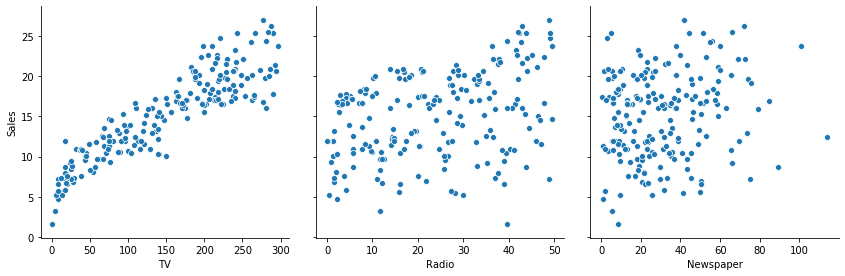

In [9]:
sns.pairplot(advertising,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=4,aspect=1,kind='scatter')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

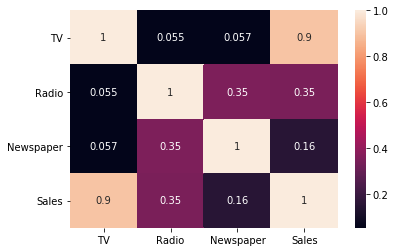

In [11]:
sns.heatmap(advertising.corr(),annot=True)
plt.show

# Step 3: Performing simple linear regression

In [12]:
# y = m*TV+C

In [13]:
X = advertising['TV']
y = advertising['Sales']

# Train-test split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [15]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [16]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

# Build a linear model

In [17]:
import statsmodels.api as sm

In [18]:
# Add a constant to get an intercept

X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm).fit()

In [19]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [20]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           1.52e-52
Time:                        08:52:16   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

# R^2 = 1-rss/tss
y=mx1+c+mx2

RSS = (ypred-yactual)^2

1 - 0.81
2   - >=0.81
3 --> >=

#Adjust r-square

1 - 0.814
2 - 0.82
3 - 0.81
4 - 0.80


adjusted r-square   = (1-r^2) * ()/n-p+1
n=sample size of your dataframe
p= number of feature variables

In [21]:
#Sales = 6.948+0.0545*TV

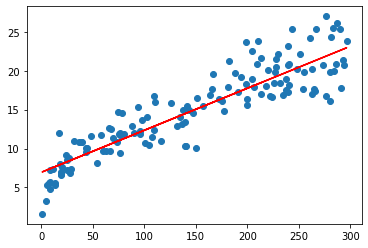

In [22]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show()

# Step4 : Residual Analysis

In [24]:
y_train_pred  = lr.predict(X_train_sm)
res = (y_train-y_train_pred)

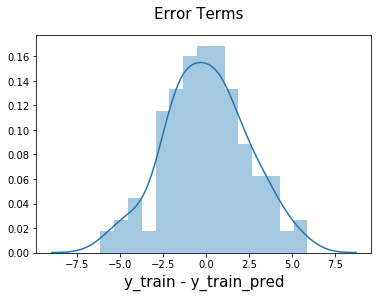

In [25]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms' , fontsize=15)
plt.xlabel('y_train - y_train_pred',fontsize=15)
plt.show()